In [2]:
import os
import pandas as pd
import numpy as np
# ! pip install supervenn
from supervenn import supervenn

import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_dropbox_dir

In [12]:

dropbox_dir = get_dropbox_dir()

base_dir = os.path.join(dropbox_dir, 'development_CohortCombination','alignment_RCC_2024_Feb_27')
cohort_ids_to_labels_file = os.path.join(base_dir, 'cohort_ids_to_labels.csv')

matt_ft_dir = os.path.join(base_dir, 'matt_top_fts')

all_res_dct = {}

for input_freq in [0.1,0.2,0.4]:
    for ref_freq in [0.4,0.6,0.8]:
        data_dir = os.path.join(base_dir,'alignment_id_28', 'merge_reference_freq_th_{ref_freq}_freq_th_{input_freq}'.format(ref_freq=ref_freq, input_freq=input_freq))


        align_score_file = os.path.join(data_dir, 'align_score_df.csv')
        if not os.path.exists(align_score_file):
            continue

        align_score_df = pd.read_csv(align_score_file, index_col=0)

        all_res_dct[(ref_freq, input_freq)] = align_score_df
# align_feats_file = os.path.join(data_dir, 'alignment_df.csv')

In [13]:
res_df = pd.concat(all_res_dct.values(), keys=all_res_dct.keys(), names=['ref_freq', 'input_freq'])
res_df.columns = ['align_score']

In [14]:
res_df.columns

Index(['align_score'], dtype='object')

In [16]:
res_df.pivot_table(index='ref_freq', columns='input_freq', values='align_score', aggfunc='mean').round(2)

input_freq,0.1,0.2,0.4
ref_freq,,,
0.4,0.34,0.32,0.32
0.6,0.35,0.33,0.30


In [17]:
res_df.pivot_table(index='ref_freq', columns='input_freq', values='align_score', aggfunc='min').round(2)

input_freq,0.1,0.2,0.4
ref_freq,,,
0.4,0.15,0.13,0.15
0.6,0.02,0.05,0.07


In [25]:
res_df.pivot_table(index='ref_freq', columns='input_freq', values='align_score', aggfunc=lambda x: np.percentile(x, q=50)).round(2)

input_freq,0.1,0.2,0.4
ref_freq,,,
0.4,0.33,0.30,0.31
0.6,0.35,0.32,0.29


In [55]:
ref_freq = 0.6
input_freq = 0.1
data_dir = os.path.join(base_dir,'alignment_id_28', 'merge_reference_freq_th_{ref_freq}_freq_th_{input_freq}'.format(ref_freq=ref_freq, input_freq=input_freq))
alignment_summary_file = f'{data_dir}/alignment_subset_6_summary.csv'

In [56]:
df = pd.read_csv(alignment_summary_file, index_col=0)
df = df.iloc[1:,:]


In [57]:
df.head()

,Cohort Label,Study ID,Number of Samples,Alignment Score,Number of Initial Aligned Peaks,op_25_feats Captured # (Initial),op_25_feats Captured % (Initial),168_os_pfs_feats Captured # (Initial),168_os_pfs_feats Captured % (Initial),net_matched_feats Captured # (Initial),net_matched_feats Captured % (Initial),Number of Subset Aligned Peaks,op_25_feats Captured # (Subset),op_25_feats Captured % (Subset),168_os_pfs_feats Captured # (Subset),168_os_pfs_feats Captured % (Subset),net_matched_feats Captured # (Subset),net_matched_feats Captured % (Subset)
Cohort ID,,,,,,,,,,,,,,,,,,
502,adult_cancer,ST001422,2075,0.434414,1741.0,14,0.56,89,0.529762,48,0.558140,1495,6,0.24,33,0.196,12,0.140
503,pediatric_CMD,ST001428,1542,0.314963,1262.0,6,0.24,45,0.267857,21,0.244186,1219,2,0.08,18,0.107,6,0.070
504,adult_other,ST001849,691,0.230673,924.0,6,0.24,38,0.226190,15,0.174419,822,5,0.20,44,0.262,24,0.279
505,pediatric_other,ST001931,2046,0.256608,1028.0,6,0.24,50,0.297619,20,0.232558,948,7,0.28,35,0.208,17,0.198
507,adult_other,ST002112,335,0.510224,2045.0,16,0.64,102,0.607143,56,0.651163,1547,8,0.32,58,0.345,32,0.372


In [58]:
df['Cohort Label']

Cohort ID
502       adult_cancer
503      pediatric_CMD
504        adult_other
505    pediatric_other
507        adult_other
522       adult_cancer
526       adult_cancer
547        adult_other
549        adult_other
550       adult_cancer
551        adult_other
555    pediatric_other
556      pediatric_CMD
557        adult_other
558        adult_other
559        adult_other
579      pediatric_CMD
581       adult_cancer
584      pediatric_CMD
585      pediatric_CMD
586      pediatric_CMD
587      pediatric_CMD
588      pediatric_CMD
605        adult_other
Name: Cohort Label, dtype: object

In [59]:
hue_order = ['adult_cancer','adult_other','pediatric_CMD','pediatric_other']

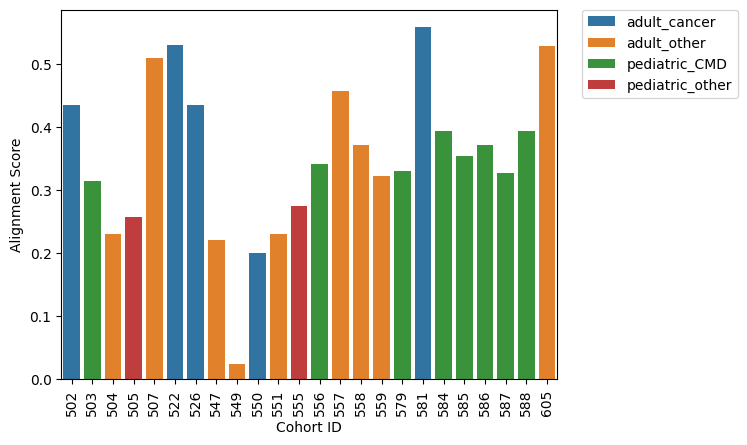

In [60]:
sns.barplot(data=df,x='Cohort ID',y='Alignment Score', hue='Cohort Label', hue_order=hue_order)
_ = plt.xticks(rotation=90)
# place legend outside of figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

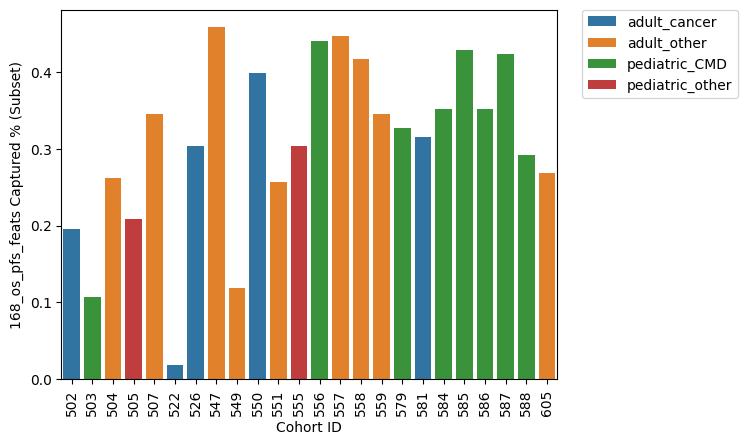

In [61]:
sns.barplot(data=df,x='Cohort ID',y='168_os_pfs_feats Captured % (Subset)', hue='Cohort Label', hue_order=hue_order)
_ = plt.xticks(rotation=90)
# place legend outside of figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

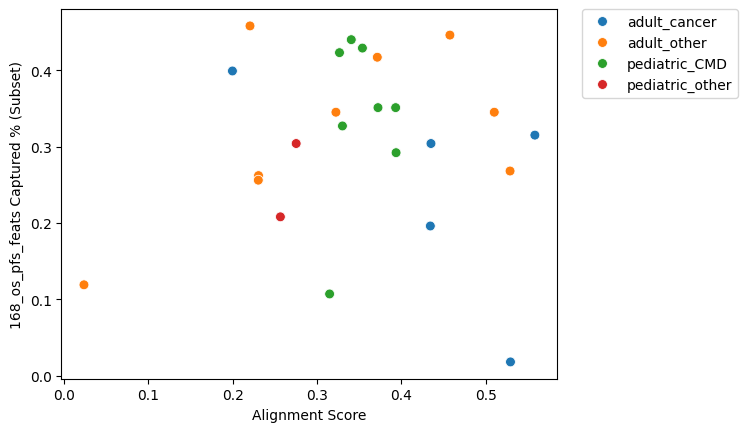

In [62]:
sns.scatterplot(data=df, x='Alignment Score', y='168_os_pfs_feats Captured % (Subset)',hue='Cohort Label',s=50, hue_order=hue_order)
# df.plot(kind='scatter', x='Alignment Score', y='168_os_pfs_feats Captured % (Subset)',hue='Cohort Label')
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)